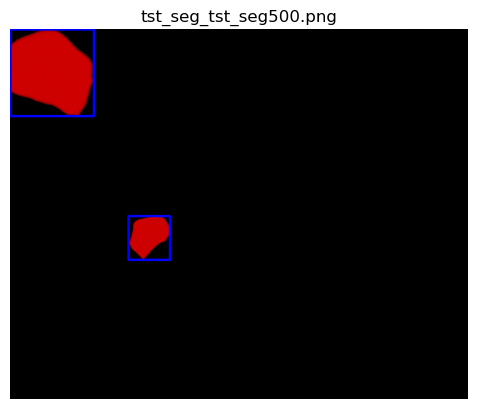

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

def read_bounding_boxes(file_path, image_shape):
    with open(file_path, 'r') as file:
        boxes = []
        height, width = image_shape[:2]
        for line in file:
            class_id, x, y, w, h = map(float, line.strip().split())
            x = int(x * width)
            y = int(y * height)
            w = int(w * width)
            h = int(h * height)
            x = x - w // 2
            y = y - h // 2
            boxes.append((x, y, w, h))
    return boxes

def draw_bounding_boxes(image, boxes):
    for (x, y, w, h) in boxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    return image

def display_images_with_bboxes(image_dir, bbox_dir):
    count = 0
    for file_name in os.listdir(image_dir):
        if file_name.endswith('.png'):
            image_path = os.path.join(image_dir, file_name)
            bbox_path = os.path.join(bbox_dir, file_name.replace('.png', '.txt'))
            
            if os.path.exists(bbox_path) and os.path.getsize(bbox_path) > 0:  # Check if file exists and is not empty:
                image = cv2.imread(image_path)
                boxes = read_bounding_boxes(bbox_path, image.shape)
                image_with_boxes = draw_bounding_boxes(image, boxes)
                
                plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
                plt.title(file_name)
                plt.axis('off')
                plt.show()
                count += 1
        if count == 5:
            break

# Example usage
image_directory = r'../images/'
bbox_directory = r'../labels/'
display_images_with_bboxes(image_directory, bbox_directory)